In [1]:
import pandas as pd
import numpy as np
import matplotlib
import missingno as msno
df = pd.read_csv("../data/allUsers.lcl.csv", header=0, delimiter=',')
df.head()

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,...,Z8,X9,Y9,Z9,X10,Y10,Z10,X11,Y11,Z11
0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
1,1,0,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,...,?,?,?,?,?,?,?,?,?,?
2,1,0,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,...,?,?,?,?,?,?,?,?,?,?
3,1,0,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,...,?,?,?,?,?,?,?,?,?,?
4,1,0,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,...,?,?,?,?,?,?,?,?,?,?


In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78096 entries, 0 to 78095
Data columns (total 38 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Class   78096 non-null  int64  
 1   User    78096 non-null  int64  
 2   X0      78096 non-null  float64
 3   Y0      78096 non-null  float64
 4   Z0      78096 non-null  float64
 5   X1      78096 non-null  float64
 6   Y1      78096 non-null  float64
 7   Z1      78096 non-null  float64
 8   X2      78096 non-null  float64
 9   Y2      78096 non-null  float64
 10  Z2      78096 non-null  float64
 11  X3      78096 non-null  object 
 12  Y3      78096 non-null  object 
 13  Z3      78096 non-null  object 
 14  X4      78096 non-null  object 
 15  Y4      78096 non-null  object 
 16  Z4      78096 non-null  object 
 17  X5      78096 non-null  object 
 18  Y5      78096 non-null  object 
 19  Z5      78096 non-null  object 
 20  X6      78096 non-null  object 
 21  Y6      78096 non-null  object 
 22

In [3]:

#df.unique()
# get unique values for all columns
unique_values = df.apply(pd.Series.unique)

print(unique_values)

Class                                   [0, 1, 2, 3, 4, 5]
User       [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
X0       [0.0, 54.2638799540698, 56.5275584513992, 55.8...
Y0       [0.0, 71.4667761378817, 72.2666086344311, 72.4...
Z0       [0.0, -64.807708780882, -61.9352524181086, -62...
X1       [0.0, 76.8956347751343, 39.1359781094435, 37.9...
Y1       [0.0, 42.462499897063, 82.5385299123923, 82.63...
Z1       [0.0, -72.7805451867589, -49.596509402198, -50...
X2       [0.0, 36.6212291601289, 79.2237427757379, 78.4...
Y2       [0.0, 81.6805569287795, 43.2540908549394, 43.5...
Z2       [0.0, -52.9192723726971, -69.982489053646, -70...
X3       [0, 85.2322638852917, 87.4508729469625, 86.835...
Y3       [0, 67.7492195028673, 68.4008083028339, 68.907...
Z3       [0, -73.684130041833, -70.703990925959, -71.13...
X4       [0, 59.1885757027887, 61.5874515532753, 61.686...
Y4       [0, 10.6789364098231, 11.7799190329758, 11.793...
Z4       [0, -71.2977813147725, -68.827417756239, -68.8.

In [4]:
# replace '?' with missing values
df = df.replace('?', pd.NA)

print(df)


       Class  User         X0          Y0         Z0         X1          Y1   
0          0     0   0.000000    0.000000   0.000000   0.000000    0.000000  \
1          1     0  54.263880   71.466776 -64.807709  76.895635   42.462500   
2          1     0  56.527558   72.266609 -61.935252  39.135978   82.538530   
3          1     0  55.849928   72.469064 -62.562788  37.988804   82.631347   
4          1     0  55.329647   71.707275 -63.688956  36.561863   81.868749   
...      ...   ...        ...         ...        ...        ...         ...   
78091      5    14  54.251127  129.177414 -44.252511  27.720784  107.810661   
78092      5    14  54.334883  129.253842 -44.016320  27.767911  107.914808   
78093      5    14  54.151540  129.269502 -44.173273  27.725978  108.034006   
78094      5    14  27.915311  108.007390  10.814957  -0.910435  122.464093   
78095      5    14  27.898705  108.092877  11.107857 -30.031402   77.740235   

              Z1         X2          Y2  ...       

In [5]:
df.describe()

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2
count,78096.000000,78096.000000,78096.000000,78096.000000,78096.000000,78096.000000,78096.000000,78096.000000,78096.000000,78096.000000,78096.000000
mean,2.983738,7.959127,50.345664,85.812051,-29.984712,49.595209,86.192647,-29.509202,48.612121,83.771315,-30.560515
std,1.421183,4.697810,32.696173,40.204363,34.361918,32.478238,40.453214,34.764398,33.605390,41.023543,35.120329
min,0.000000,0.000000,-108.552738,-98.233756,-126.770872,-111.685241,-96.142589,-166.006838,-106.886524,-100.789312,-129.595296
25%,2.000000,5.000000,29.295062,63.494432,-56.356438,28.755137,64.154529,-57.360107,25.170006,58.052385,-58.654059
50%,3.000000,9.000000,54.619964,86.526246,-30.864125,54.215514,87.542751,-30.184005,53.814580,86.458324,-32.352414
75%,4.000000,12.000000,72.488686,113.107355,-1.418803,71.762039,116.219398,-0.366692,71.561951,106.660827,-0.944786
max,5.000000,14.000000,190.017835,169.175464,113.345119,188.691997,170.209350,104.697852,188.760168,168.186466,104.590879


C:\Users\polcg\AppData\Local\Temp\ipykernel_13364\2760332217.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.missing_values = df.isnull().sum()


<Axes: >

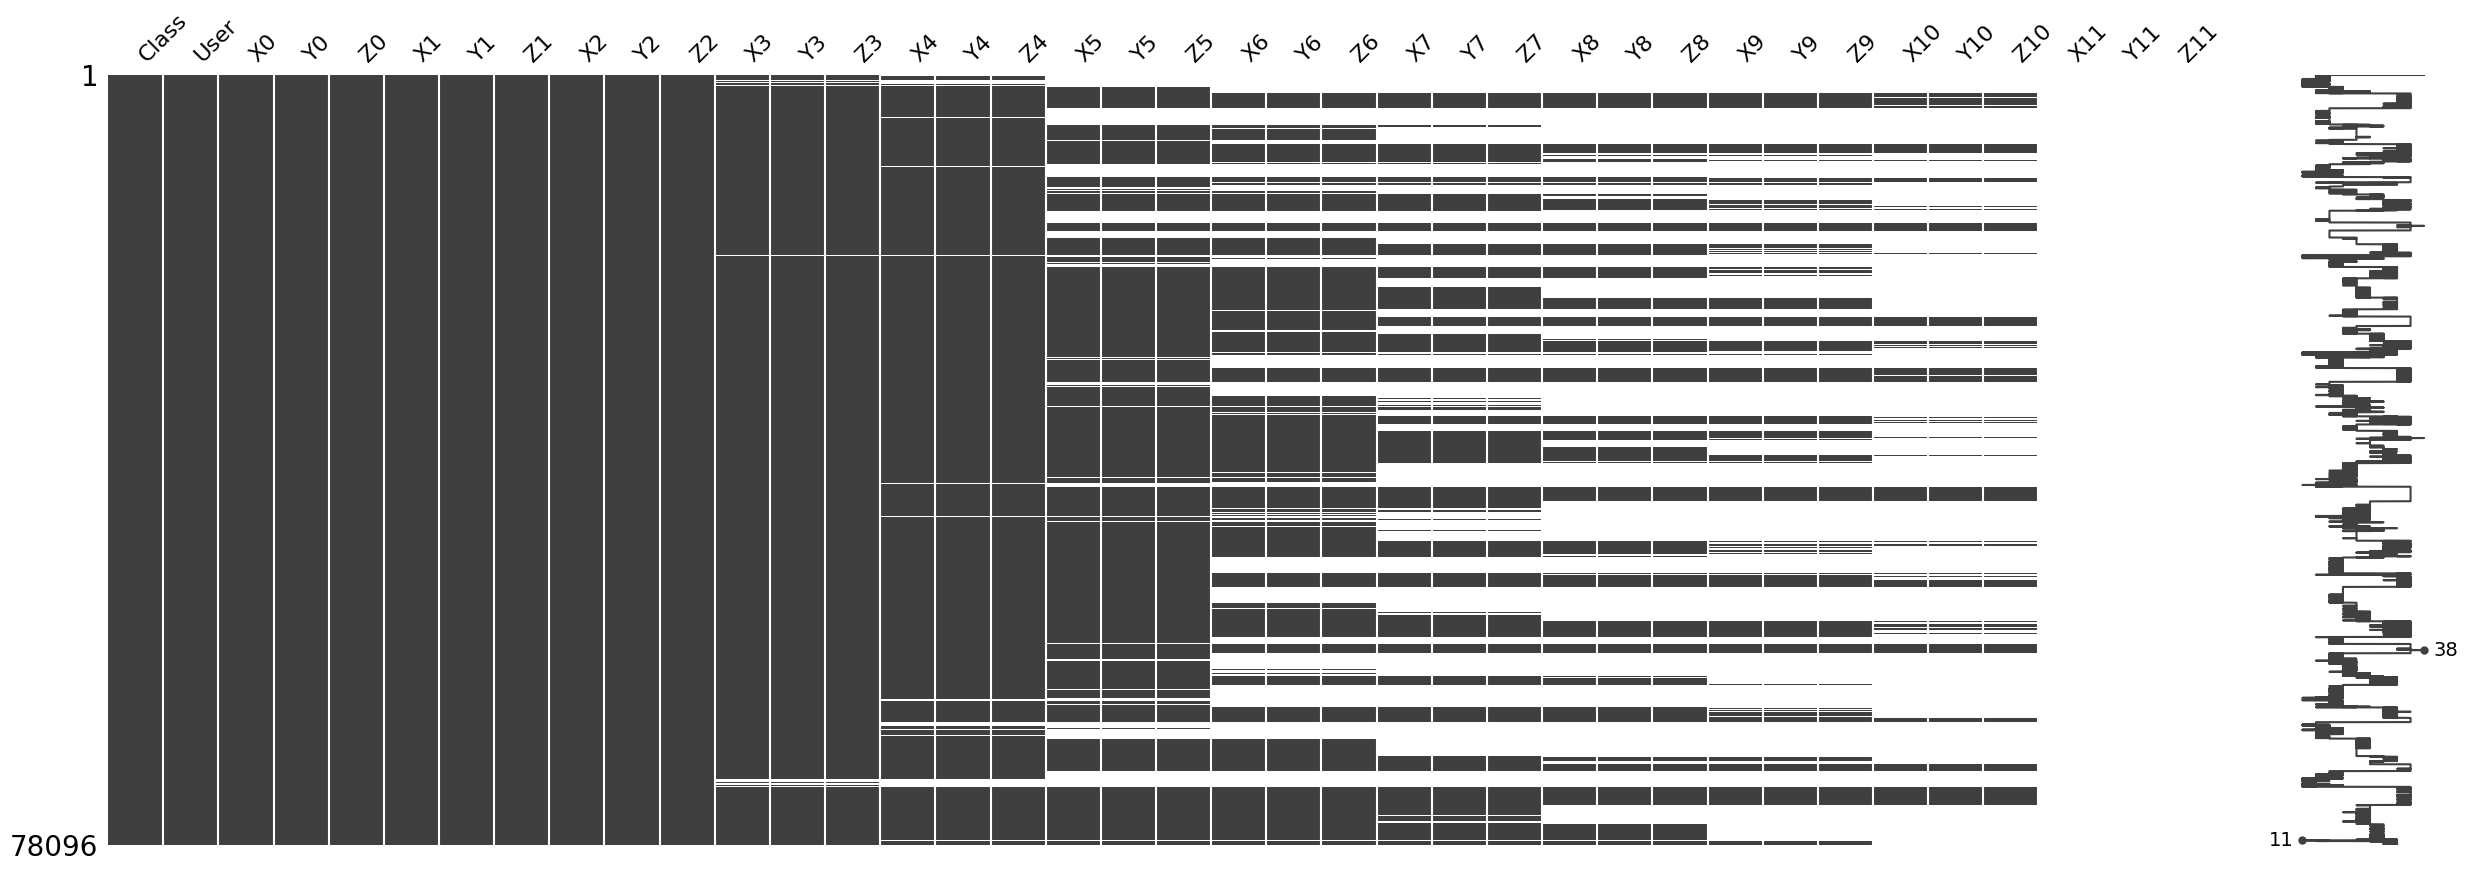

In [6]:
#df.hist(figsize=(40,50))
df.missing_values = df.isnull().sum()
#df.missing_values

msno.matrix(df, figsize = (30,10))

In [7]:
# calculate percentage of missing values for each column
missing_perc = df.isna().mean() * 100

print(missing_perc)

Class     0.000000
User      0.000000
X0        0.000000
Y0        0.000000
Z0        0.000000
X1        0.000000
Y1        0.000000
Z1        0.000000
X2        0.000000
Y2        0.000000
Z2        0.000000
X3        0.883528
Y3        0.883528
Z3        0.883528
X4        3.995083
Y4        3.995083
Z4        3.995083
X5       16.675630
Y5       16.675630
Z5       16.675630
X6       33.097726
Y6       33.097726
Z6       33.097726
X7       50.133169
Y7       50.133169
Z7       50.133169
X8       60.863553
Y8       60.863553
Z8       60.863553
X9       69.309568
Y9       69.309568
Z9       69.309568
X10      81.109148
Y10      81.109148
Z10      81.109148
X11      99.959025
Y11      99.959025
Z11      99.959025
dtype: float64


In [8]:
# drop columns with more than 50% missing data
print(len(df))
df = df.dropna(thresh=len(df) * 0.5, axis=1)
print(len(df))
df.head()

78096
78096


,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,...,Z3,X4,Y4,Z4,X5,Y5,Z5,X6,Y6,Z6
0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
1,1,0,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,...,-73.684130041833,59.1885757027887,10.6789364098231,-71.2977813147725,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,1,0,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,...,-70.703990925959,61.5874515532753,11.7799190329758,-68.827417756239,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3,1,0,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,...,-71.1383441365739,61.6864271910576,11.7934398850428,-68.88931646056,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
4,1,0,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,...,-68.9564252307431,77.3872254123912,42.7178334810919,-72.0151462991019,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [9]:

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor



In [10]:
df2 = df.drop(['Class'], axis=1)
df2 = df.drop(['User'], axis=1)
labels = df['Class']
#cls = [str(v) for v in sorted(labels[0].unique())]
X_train, X_test, y_train, y_test,  = train_test_split(df2, labels, test_size=0.20, random_state=42)


In [11]:
print(X_test)

       Class          X0          Y0         Z0         X1          Y1   
26068      3  109.240478   44.899381 -60.024315  61.033350   85.559458  \
54379      4   24.330178  101.140373   1.816550  55.473059  131.027370   
68797      4   63.498073   17.176245 -60.413507  74.682024   48.333237   
72427      2   86.767860   74.450010 -46.187383  57.077763   99.699882   
77992      5   -2.025544   99.352134   6.365841  76.213345   33.631282   
...      ...         ...         ...        ...        ...         ...   
11925      3   49.388607  142.914789 -23.766968  73.694416   71.467097   
57386      1   41.653864   77.665012 -45.920230  44.615086    8.313146   
12081      3   45.077739  145.271166 -16.379576  47.490983   92.218880   
11541      3   -5.946223   62.177684  52.986602  52.992692   83.999676   
42250      2   89.991946   78.340700 -23.610774  45.653754   88.109854   

              Z1          X2          Y2         Z2  ...                 Z3   
26068 -18.295491   68.721592    

In [12]:
from IPython.display import display, HTML
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
from yellowbrick.classifier.rocauc import roc_auc



In [13]:
knn = KNeighborsClassifier()
print(np.mean(cross_val_score(knn,X_train , np.ravel(y_train), cv=10)))
niter = 15
cv = 5
param = {'n_neighbors': [1, 3, 5, 7, 11, 15],
         'weights': ['distance', 'uniform'],
         'leaf_size': [1, 5, 10, 20, 30],
         'metric': ['l2', 'l1', 'cosine']}

knn_gs = GridSearchCV(knn, param, cv=cv, n_jobs=-1)
knn_gs.fit(X_train, np.ravel(y_train))


C:\Users\polcg\.virtualenvs\MD2-NovaiZ3s\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


ValueError: 
All the 10 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\polcg\.virtualenvs\MD2-NovaiZ3s\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\polcg\.virtualenvs\MD2-NovaiZ3s\Lib\site-packages\sklearn\neighbors\_classification.py", line 215, in fit
    return self._fit(X, y)
           ^^^^^^^^^^^^^^^
  File "C:\Users\polcg\.virtualenvs\MD2-NovaiZ3s\Lib\site-packages\sklearn\neighbors\_base.py", line 454, in _fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\polcg\.virtualenvs\MD2-NovaiZ3s\Lib\site-packages\sklearn\base.py", line 584, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\polcg\.virtualenvs\MD2-NovaiZ3s\Lib\site-packages\sklearn\utils\validation.py", line 1106, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "C:\Users\polcg\.virtualenvs\MD2-NovaiZ3s\Lib\site-packages\sklearn\utils\validation.py", line 879, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\polcg\.virtualenvs\MD2-NovaiZ3s\Lib\site-packages\sklearn\utils\_array_api.py", line 185, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\polcg\.virtualenvs\MD2-NovaiZ3s\Lib\site-packages\pandas\core\generic.py", line 1998, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: float() argument must be a string or a real number, not 'NAType'


In [ ]:
show_html = lambda html: display(HTML(html))
show_html(pd.DataFrame(knn_gs.cv_results_).loc[:, ['params', 'mean_test_score', 'rank_test_score']].sort_values(
    by='rank_test_score').head().to_html())

In [ ]:
print(classification_report(knn_gs.predict(X_test), y_test, target_names=cls))
plt.figure(figsize=(8, 8))

In [ ]:
roc_auc(knn_gs, X_train , y_train, X_test, y_test, classes=cls);